In [1]:
# 분석에 필요한 패키지 불러오기
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\numpyPandasTest\\fastcampus'

In [4]:
ploan = pd.read_csv("../fcdata/Personal Loan.csv")
ploan


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


In [5]:
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 

'''

'\nExperience 경력\nIncome 수입\nFamliy 가족단위\nCCAvg 월 카드사용량 \nEducation 교육수준 (1: undergrad; 2, Graduate; 3; Advance )\nMortgage 가계대출\nSecurities account 유가증권계좌유무\nCD account 양도예금증서 계좌 유무\nOnline 온라인계좌유무\nCreidtCard 신용카드유무 \n\n'

In [6]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [7]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,1.0,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,1.0,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,1.0,38,14,111,2,6.1,1,326,0,0,0,0,0


# 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터

In [8]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y = f(x)

In [10]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.6030
Time:                        16:18:09   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [12]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

model AIC:  482.69329


In [13]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

### 해석을 할 때 exp을 붙여서 해석을 하는 것이 편함(아래와 같이)

In [14]:
## 나이가 한살 많을수록록 대출할 확률이 1.024 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임
np.exp(results.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [15]:
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [16]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [17]:
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [18]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy

0.9466666666666667

In [19]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

## 임계값(cut-off)에 따른 성능지표 비교


In [20]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] =acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9463923891858513


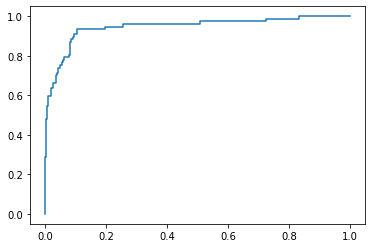

In [21]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [22]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan","Experience",  "Mortgage"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [23]:
train_x2, test_x2, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [24]:
model = sm.Logit(train_y, train_x2)
results2 = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [25]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.6029
Time:                        16:19:30   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.6030
Time:                        16:19:30   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

### 해석 : "Experience",  "Mortgage" 변수는 애초에 pvalue가 굉장히 높아서 y에 끼치는 영향력이 낮고, 다른 변수들과 y를 설명하는 변동성이 낮음
### 그래서 summary를 보면 비슷하게 나옴!

In [30]:
pred_y = results2.predict(test_x2)

In [31]:
pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [35]:
cfmat2 = confusion_matrix(test_y, pred_Y)
(cfmat2[0,0]+cfmat2[1,1])/len(pred_Y) ## accuracy

0.944

In [36]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = (cfmat[0,0]+cfmat[1,1])/len(pred_Y)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9465467667547905


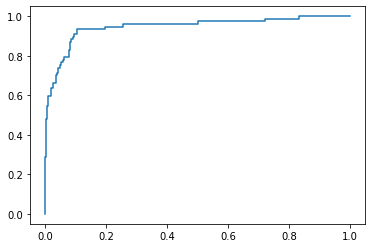

In [37]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


변수선택법

In [38]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [39]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [40]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [41]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

In [42]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.137663
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134821
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131859
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142500
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152443
  

In [43]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
  

Optimization terminated successfully.
         Current function value: 0.135928
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133263
         Iterations 9
Processed  6 models on 6 predictors in 0.019946813583374023
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001B83AA74708>
forward
Optimization terminated successfully.
         Current function value: 0.136599
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.137180
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.144927
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154299
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.157364
         Iterations 9
Optimizati

In [44]:
pred_y_full = results2.predict(test_x2) # full model
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [45]:
pred_Y_full= cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward,0.5)
pred_Y_backward = cut_off(pred_y_backward,0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise,0.5)

In [46]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [47]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))


0.944
0.944
0.944
0.944


AUC: 0.9465467667547905


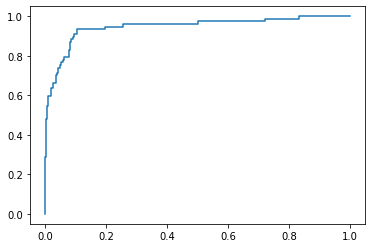

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


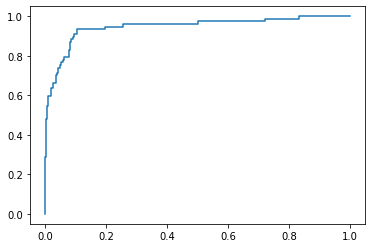

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


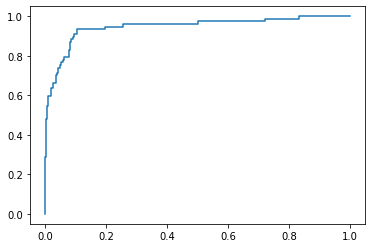

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


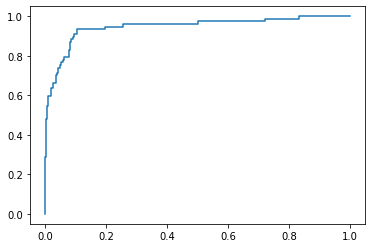

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### 성능면에서는 네 모델이 큰 차이가 없음

# Lasso & RIdge

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [54]:
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [61]:
## lasso 적합
# 여기에서의 alpha값이 이론에서의 람다를 의미함

ll = Lasso(alpha=0.01)
ll.fit(train_x, train_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
## 회귀 계수 출력
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.6030
Time:                        16:28:07   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [65]:
## 예측, confusionmatrix, acc계산

pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))

0.936


AUC: 0.9439995368672931


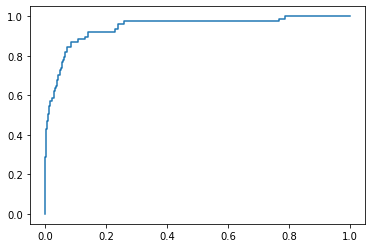

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [71]:
## ridge 적합
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
## ridge result
rr.coef_

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [73]:
## lasso result
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [75]:
## ridge y예측, confusion matrix, acc계산 

pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_ridge)
print(acc(cfmat))

0.932


AUC: 0.9494992377607533


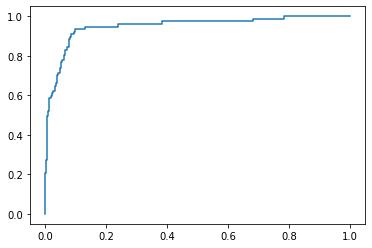

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [81]:
# lambda 값에 따른 회귀 계수 / accuracy 계산 
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [82]:
## labmda값 0.001 ~ 10까지 범위 설정
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [83]:
data = []
acc_table=[]
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    pred_y = lasso.predict(test_x) # full model
    pred_y= cut_off(pred_y,0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))
    

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso
acc_table_lasso = pd.DataFrame(acc_table, index=alpha).T

In [84]:
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.335006,-0.381869,-0.143698,-0.113103,0.102286
1,-0.002109,0.000000,0.000000,0.000000,-0.000000
2,0.006829,0.002048,0.000000,0.000000,0.000000
3,0.322174,0.114390,0.000000,0.000000,0.000000
4,-0.043385,-0.000000,-0.000000,-0.000000,-0.000000
5,0.076771,0.065834,0.000000,0.000000,0.000000
6,0.002534,0.000477,0.000000,0.000000,-0.000000
7,0.035728,0.031340,0.000000,0.000000,0.000000
8,0.003313,0.003554,0.003291,0.002893,0.000000
9,0.000004,0.000013,0.000016,0.000000,0.000000


In [85]:
acc_table_lasso

# 0.010가 적당하다

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.936,0.894667,0.897333,0.897333


In [86]:
data = []
acc_table=[]
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x) # full model
    pred_y= cut_off(pred_y,0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))

    
df_ridge = pd.DataFrame(data, index=alpha).T
acc_table_ridge = pd.DataFrame(acc_table, index=alpha).T

In [87]:
df_ridge

# 더이상 축소할 변수가 없드

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


In [88]:
acc_table_ridge

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


## labmda값의 변화에 따른 회귀계수 축소 시각화

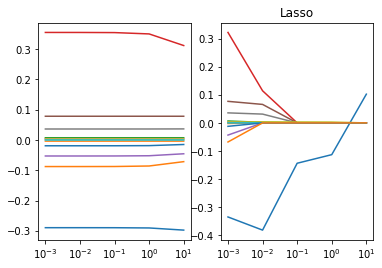

In [89]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()

### 결론 : 변수가 많지 않아서 다 써도 되지만, 해석하는데 있어서 문제가 생길 수 있으니 p-value가 높은 두 개의 변수를 제거한 모델 또는 변수선택법을 사용해서 나온 모델을 쓰는게 맞다. -> 하지만 Ridge와 Lasso는 람다 값에 따라서 변화가 심하고 좋았다고 생각한 변수가 0으로 수렴하고 좋지 않다고 생각한 변수가 살아나면서 원래 사용했던 로지스틱 회귀를 사용하는 것이 맞다고 결론 내릴 수 있다.